<a href="https://colab.research.google.com/github/WilliamHackspeare/Legal_Data_Analysis/blob/main/Legal_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/legal_data

/content/drive/MyDrive/legal_data


In [3]:
!ls

acts_sections  cases  cases_2010_v2.csv  judges_clean  keys


In [4]:
import pandas as pd
import numpy as np

In [5]:
cases_2010 = pd.read_csv('cases/cases_2010.csv')

In [6]:
iter_as = pd.read_csv('acts_sections/acts_sections.csv',iterator=True,chunksize=1000000)
acts_sections = pd.concat([chunk[chunk['ddl_case_id'].isin(cases_2010['ddl_case_id'])] for chunk in iter_as])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
acts_sections = acts_sections.astype(str)

In [8]:
acts_sections.describe()

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal
count,2190872,2190872,2190872,2190872,2190872,2190872
unique,2190872,6092,112198,6,27,2
top,01-09-02-203003037042010,17353.0,nan,nan,nan,0
freq,1,680495,245507,1735665,1510377,1353458


In [9]:
acts_sections['bailable_ipc'].value_counts()

nan                          1735665
bailable                      249281
non-bailable                  176019
not applicable to section      15688
depends                        12819
unclear, need to check          1400
Name: bailable_ipc, dtype: int64

In [10]:
disp_key = pd.read_csv('keys/disp_name_key.csv')
disp_key = disp_key[disp_key['year']==2010]
purp_key = pd.read_csv('keys/purpose_name_key.csv')
purp_key = purp_key[purp_key['year']==2010]

In [11]:
cases_2010.dropna(inplace=True)

In [12]:
disp_key = disp_key.astype(str)
purp_key = purp_key.astype(str)

In [13]:
 cases_2010 = cases_2010.astype(str)

In [14]:
disp_key.describe()

,year,disp_name,disp_name_s,count
count,51,51,51,51
unique,1,51,51,51
top,2010,1,258 crpc,15765
freq,51,1,1,1


In [15]:
cases_2010.describe()

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
count,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518,3298518
unique,3298518,1,31,75,65,3293058,415,4,4,4,4,5092,4604,51,365,4163,4422,4121,4344
top,01-01-01-200308002162010,2010,1,1,1,TNSA010008922010,district and sessions court,0 male,-9998 unclear,-9999,-9999,682,1963.0,22,2010-09-13,2014-12-06,2010-12-11,2010-12-11,2014-12-06
freq,1,3298518,760617,168347,626891,3,641834,2219700,1472001,2410238,1388855,274408,466661,498930,17171,27890,11891,11740,23142


In [16]:
cases_2010 = cases_2010.merge(acts_sections)
cases_2010 = cases_2010.merge(disp_key,on='disp_name')
cases_2010 = cases_2010.merge(purp_key,on='purpose_name')

In [17]:
cases_2010['female_defendant'].value_counts()

0 male                1152083
-9998 unclear          315893
1 female               207475
-9999 missing name      22813
Name: female_defendant, dtype: int64

In [18]:
cases_2010['female_petitioner'].value_counts()

-9998 unclear         838841
0 male                615470
1 female              231961
-9999 missing name     11992
Name: female_petitioner, dtype: int64

In [19]:
cases_2010['date_first_list'].value_counts()

2010-12-11    6492
2010-12-20    5141
2010-11-29    5068
2010-11-30    4762
2010-11-22    4748
              ... 
2008-09-01       1
2009-09-05       1
2006-12-13       1
2009-04-07       1
2009-02-25       1
Name: date_first_list, Length: 3945, dtype: int64

In [20]:
cases_2010['date_last_list'].value_counts()

2010-12-11    6442
2014-12-06    3611
2016-10-08    3422
2011-11-19    3345
2017-02-11    3329
              ... 
2004-02-04       1
2009-01-28       1
2004-01-21       1
2020-08-03       1
2020-03-31       1
Name: date_last_list, Length: 3905, dtype: int64

In [21]:
cases_2010['date_of_filing'].value_counts()

2010-09-13    10501
2010-12-23     8469
2010-12-20     8385
2010-11-29     8272
2010-07-12     8186
              ...  
2010-03-14      173
2010-02-14      169
2010-07-11      166
2010-01-31      153
2010-08-15      148
Name: date_of_filing, Length: 365, dtype: int64

In [22]:
cases_2010['date_of_decision'].value_counts()

2014-12-06    8460
2010-12-11    8350
2011-02-06    8031
2012-03-04    7680
2013-11-23    7398
              ... 
0211-10-14       1
2009-09-09       1
2020-03-25       1
2009-05-13       1
2020-03-31       1
Name: date_of_decision, Length: 3907, dtype: int64

In [23]:
len(cases_2010['date_first_list'].loc[1])

10

In [24]:
for d in cases_2010.columns:
  if 'date' in d:
    cases_2010 = cases_2010[cases_2010[d].apply(lambda x: len(str(x)))==10]

In [25]:
cases_2010.describe()

,ddl_case_id,year_x,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,...,section,bailable_ipc,number_sections_ipc,criminal,year_y,disp_name_s,count_x,year,purpose_name_s,count_y
count,1698264,1698264,1698264,1698264,1698264,1698264,1698264,1698264,1698264,1698264,...,1698264,1698264,1698264,1698264,1698264,1698264,1698264,1698264,1698264,1698264
unique,1698264,1,31,75,64,1697352,393,4,4,4,...,91879,6,27,2,1,51,51,1,3112,607
top,01-01-01-200308002162010,2010,1,23,1,BRMB100001552010,district and sessions court,0 male,-9998 unclear,-9999,...,nan,nan,nan,0,2010,acquitted,406015,2010,judgement,495331
freq,1,1698264,616004,87170,339501,2,316764,1152083,838841,1193144,...,185617,1382312,1213222,1081458,1698264,227610,227610,1698264,223480,223480


In [26]:
for d in cases_2010.columns:
  if 'date' in d:
    cases_2010[d] = pd.to_datetime(cases_2010[d], errors='coerce').dt.date

In [27]:
cases_2010.dropna(inplace=True)

In [28]:
cases_2010.describe()

,ddl_case_id,year_x,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,...,section,bailable_ipc,number_sections_ipc,criminal,year_y,disp_name_s,count_x,year,purpose_name_s,count_y
count,1697894,1697894,1697894,1697894,1697894,1697894,1697894,1697894,1697894,1697894,...,1697894,1697894,1697894,1697894,1697894,1697894,1697894,1697894,1697894,1697894
unique,1697894,1,31,75,64,1696982,393,4,4,4,...,91840,6,27,2,1,51,51,1,3112,607
top,01-01-01-200308002162010,2010,1,23,1,BRMB100001402010,district and sessions court,0 male,-9998 unclear,-9999,...,nan,nan,nan,0,2010,judgement,353931,2010,judgement,495331
freq,1,1697894,616001,87168,339452,2,316721,1151870,838722,1192949,...,185602,1381993,1212918,1081192,1697894,227580,227580,1697894,223391,223391


In [29]:
cases_2010['judge_position'].value_counts()

district and sessions court               316721
chief judicial magistrate                 172464
judicial magistrate court                 152714
civil court                               141450
criminal cases                            112240
                                           ...  
civil cases                                    1
paliganj civil div.                            1
sumbal civil                                   1
special court for forest offense cases         1
cj - kishanganj taluka                         1
Name: judge_position, Length: 393, dtype: int64

In [30]:
for d in cases_2010.columns:
  if 'female' in d:
    cases_2010 = cases_2010[~cases_2010[d].str.contains('-9998|-9999')]

In [31]:
cases_2010.describe()

,ddl_case_id,year_x,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,...,section,bailable_ipc,number_sections_ipc,criminal,year_y,disp_name_s,count_x,year,purpose_name_s,count_y
count,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,...,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626
unique,126626,1,31,70,52,126611,230,2,2,2,...,18016,6,19,2,1,49,49,1,1022,515
top,01-02-01-201201003152010,2010,1,20,1,TNTJ100001522010,district and sessions court,0 male,0 male,0,...,346623.0,nan,nan,0,2010,dismissed,540748,2010,judgement,495331
freq,1,126626,31431,7968,26657,2,22563,96219,84073,112844,...,6752,114734,110698,100898,126626,29042,29042,126626,29086,29086


In [32]:
cases_2010['judge_position'].value_counts()

district and sessions court                         22563
civil judge junior division                         11516
civil court                                         11460
civil judge senior division                         10434
judicial magistrate court                            8463
                                                    ...  
senior court hyderabad                                  1
additional jmfc                                         1
co-operative appellate court aurangabad                 1
co-operative court raigad-ratnagiri at ratnagiri        1
commercial-jodhpur metro hq                             1
Name: judge_position, Length: 230, dtype: int64

In [33]:
sum(cases_2010['cino'].value_counts()==1)

126596

In [34]:
cases_2010.drop(columns=['ddl_case_id','year','year_x','year_y','cino','count_x','count_y','purpose_name','disp_name'],inplace=True)

In [35]:
cases_2010.describe()

,state_code,dist_code,court_no,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,date_of_filing,...,date_first_list,date_last_list,date_next_list,act,section,bailable_ipc,number_sections_ipc,criminal,disp_name_s,purpose_name_s
count,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,...,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626
unique,31,70,52,230,2,2,2,2,1232,365,...,2817,3416,3400,1524,18016,6,19,2,49,1022
top,1,20,1,district and sessions court,0 male,0 male,0,0,3692,2010-07-12,...,2010-11-22,2017-02-11,2013-11-23,17353.0,346623.0,nan,nan,0,dismissed,judgement
freq,31431,7968,26657,22563,96219,84073,112844,117305,18006,915,...,407,176,375,15928,6752,114734,110698,100898,29042,29086


In [36]:
cases_2010['court_id'] = cases_2010['state_code']+'-'+cases_2010['dist_code']+'-'+cases_2010['court_no']

In [37]:
cases_2010.describe()

,state_code,dist_code,court_no,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,date_of_filing,...,date_last_list,date_next_list,act,section,bailable_ipc,number_sections_ipc,criminal,disp_name_s,purpose_name_s,court_id
count,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,...,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626
unique,31,70,52,230,2,2,2,2,1232,365,...,3416,3400,1524,18016,6,19,2,49,1022,3513
top,1,20,1,district and sessions court,0 male,0 male,0,0,3692,2010-07-12,...,2017-02-11,2013-11-23,17353.0,346623.0,nan,nan,0,dismissed,judgement,2-5-1
freq,31431,7968,26657,22563,96219,84073,112844,117305,18006,915,...,176,375,15928,6752,114734,110698,100898,29042,29086,1149


In [38]:
cases_2010.drop(columns=['state_code','dist_code','court_no'],inplace=True)

In [39]:
cases_2010.describe()

,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list,act,section,bailable_ipc,number_sections_ipc,criminal,disp_name_s,purpose_name_s,court_id
count,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626,126626
unique,230,2,2,2,2,1232,365,3379,2817,3416,3400,1524,18016,6,19,2,49,1022,3513
top,district and sessions court,0 male,0 male,0,0,3692,2010-07-12,2013-11-23,2010-11-22,2017-02-11,2013-11-23,17353.0,346623.0,nan,nan,0,dismissed,judgement,2-5-1
freq,22563,96219,84073,112844,117305,18006,915,405,407,176,375,15928,6752,114734,110698,100898,29042,29086,1149


In [45]:
cases_2010_v2 = cases_2010.astype('category')

In [46]:
for d in cases_2010_v2.columns:
  cases_2010_v2[d] = cases_2010_v2[d].cat.codes

In [47]:
cases_2010_v2.describe()

,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list,act,section,bailable_ipc,number_sections_ipc,criminal,disp_name_s,purpose_name_s,court_id
count,126626.000000,126626.000000,126626.000000,126626.00000,126626.000000,126626.000000,126626.000000,126626.000000,126626.000000,126626.000000,126626.000000,126626.000000,126626.000000,126626.000000,126626.000000,126626.000000,126626.000000,126626.000000,126626.000000
mean,107.170771,0.240132,0.336053,0.10884,0.073610,651.594270,182.118530,1531.001824,706.753542,1530.408376,1535.578483,892.892313,10400.372964,1.934540,16.419645,0.203181,23.320969,497.562894,1621.075316
std,47.967015,0.427165,0.472359,0.31144,0.261137,312.178984,104.996476,815.953411,533.682676,839.251889,824.294125,444.147376,6204.358716,0.503417,4.618318,0.402368,12.754052,240.666094,959.893861
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,0.000000,0.000000,0.00000,0.000000,449.000000,90.000000,797.000000,304.000000,772.000000,794.000000,530.000000,3681.250000,2.000000,18.000000,0.000000,20.000000,346.000000,589.000000
50%,91.000000,0.000000,0.000000,0.00000,0.000000,697.000000,186.000000,1522.000000,549.000000,1502.000000,1526.000000,1059.000000,13756.000000,2.000000,18.000000,0.000000,22.000000,547.000000,1786.000000
75%,149.000000,0.000000,1.000000,0.00000,0.000000,814.000000,271.000000,2205.000000,1021.000000,2232.000000,2220.000000,1134.000000,15146.000000,2.000000,18.000000,0.000000,30.000000,624.000000,2417.000000
max,229.000000,1.000000,1.000000,1.00000,1.000000,1231.000000,364.000000,3378.000000,2816.000000,3415.000000,3399.000000,1523.000000,18015.000000,5.000000,18.000000,1.000000,48.000000,1021.000000,3512.000000


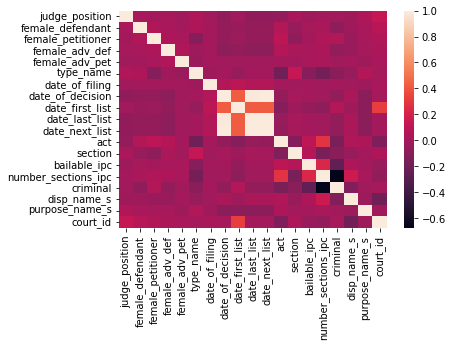

In [48]:
import seaborn as sns

sns.heatmap(cases_2010_v2.corr())